In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense

# 2. Keras로 LSTM 구현하기

https://keras.io/api/layers/recurrent_layers/lstm/

사실 실제로 SimpleRNN이 사용되는 경우는 거의 없습니다. 이보다는 LSTM이나 GRU을 주로 사용하는데, 이번에는 임의의 입력에 대해서 LSTM을 사용할 경우를 보겠습니다.

In [4]:
John = [1,0,0,0]
loves = [0,1,0,0]
Jane = [0,0,1,0]
Alex = [0,0,0,1]

train_X = np.array([
    [ John, loves, Jane ],
    [ Jane, loves, Alex ]
]).astype(np.float32)

S = [0] # subject
V = [1] # verb
O = [2] # object

idx2tag = ['S', 'V', 'O']

train_Y = np.array([[S, V, O], [S, V, O]]).astype(np.float32)

print("train_y", train_Y)
print("train_X의 shape", train_X.shape)
print("train_Y의 shape", train_Y.shape)

train_y [[[0.]
  [1.]
  [2.]]

 [[0.]
  [1.]
  [2.]]]
train_X의 shape (2, 3, 4)
train_Y의 shape (2, 3, 1)


In [5]:
train_X.shape

(2, 3, 4)

return_state란? return 마지막 state로 기억해 보기(아래는 확인용)
실제 모델 층 쌓을 때는 return_state 굳이 줄 필요 없음.(seq to seq 쓸 때 필요한데 일반적으로는 값 주지 않음)

In [7]:
lstm = LSTM(10, return_sequences = True, return_state = True)
output = lstm(train_X) # 전체 t의 ht,  # 마지막 시점 ht, # 마지막 시점의 Ct

In [8]:
len(output)

3

(2,3,4)가 (2,3,10)으로 반환됨
- array [[제인],[love],[알렉스]]형태로 4개짜리 벡터가 lstm통과하고 벡터 10개짜리로 바뀜.
- 각 어레이의 마지막 부분이 return state.

In [9]:
output[0] # 전체 t의 ht

<tf.Tensor: shape=(2, 3, 10), dtype=float32, numpy=
array([[[-0.07927571,  0.0237852 , -0.05679783,  0.06823121,
          0.04293094,  0.0544439 , -0.05409888, -0.01466174,
         -0.06386504,  0.07496107],
        [ 0.00322789,  0.04899698, -0.05376655, -0.00338908,
          0.05761353,  0.06216101, -0.0489047 ,  0.02307498,
          0.0110122 ,  0.13893023],
        [-0.04726383,  0.02487498, -0.07715853, -0.02821018,
          0.11018698,  0.0334888 ,  0.01718591,  0.06375179,
         -0.06619674,  0.02572637]],

       [[-0.05131845, -0.02502643, -0.04117173, -0.03574254,
          0.05779628, -0.01089854,  0.06303229,  0.05413761,
         -0.06976561, -0.05290275],
        [ 0.00658521,  0.00514573, -0.05816996, -0.06847725,
          0.06393861,  0.03058287,  0.04086154,  0.08049852,
          0.02051996,  0.03155776],
        [-0.09915855,  0.02079362, -0.03994425, -0.00678448,
          0.09018358, -0.0278016 ,  0.09035642,  0.05071371,
          0.00965999,  0.02938804]

In [10]:
output[0][:, -1] # 전체 t의 ht 에서 마지막 시점만 따로 출력

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.04726383,  0.02487498, -0.07715853, -0.02821018,  0.11018698,
         0.0334888 ,  0.01718591,  0.06375179, -0.06619674,  0.02572637],
       [-0.09915855,  0.02079362, -0.03994425, -0.00678448,  0.09018358,
        -0.0278016 ,  0.09035642,  0.05071371,  0.00965999,  0.02938804]],
      dtype=float32)>

In [11]:
output[1] # 마지막 시점 ht

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.04726383,  0.02487498, -0.07715853, -0.02821018,  0.11018698,
         0.0334888 ,  0.01718591,  0.06375179, -0.06619674,  0.02572637],
       [-0.09915855,  0.02079362, -0.03994425, -0.00678448,  0.09018358,
        -0.0278016 ,  0.09035642,  0.05071371,  0.00965999,  0.02938804]],
      dtype=float32)>

In [12]:
output[2] # 마지막 시점의 Ct = Cell state

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.10782496,  0.05333187, -0.18423587, -0.05882195,  0.20395054,
         0.07039356,  0.03619787,  0.15116026, -0.11469258,  0.06365635],
       [-0.18581471,  0.03608952, -0.08830802, -0.01528455,  0.15429807,
        -0.05167698,  0.17014356,  0.09705975,  0.02269295,  0.05741006]],
      dtype=float32)>

In [13]:
# return_sequences = True

lstm = LSTM(3, return_sequences=True, return_state=True)
whole_seq_output, final_hidden_state, final_cell_state = lstm(train_X)

print('whole_seq_output: {}, shape: {}'.format(whole_seq_output, whole_seq_output.shape))
print('final_hidden_state : {}, shape: {}'.format(final_hidden_state, final_hidden_state.shape))
print('final_cell_state : {}, shape: {}'.format(final_cell_state, final_cell_state.shape))

whole_seq_output: [[[ 0.040941    0.0299633  -0.17453797]
  [ 0.09863089  0.13346939  0.04203638]
  [ 0.08469316  0.20032497 -0.03239341]]

 [[ 0.02732586  0.10678348 -0.08072892]
  [ 0.09525546  0.17129181  0.10592014]
  [ 0.08771934  0.20776102  0.01240165]]], shape: (2, 3, 3)
final_hidden_state : [[ 0.08469316  0.20032497 -0.03239341]
 [ 0.08771934  0.20776102  0.01240165]], shape: (2, 3)
final_cell_state : [[ 0.16008446  0.46244073 -0.05120235]
 [ 0.21684042  0.3456918   0.0262845 ]], shape: (2, 3)


다층 LSTM

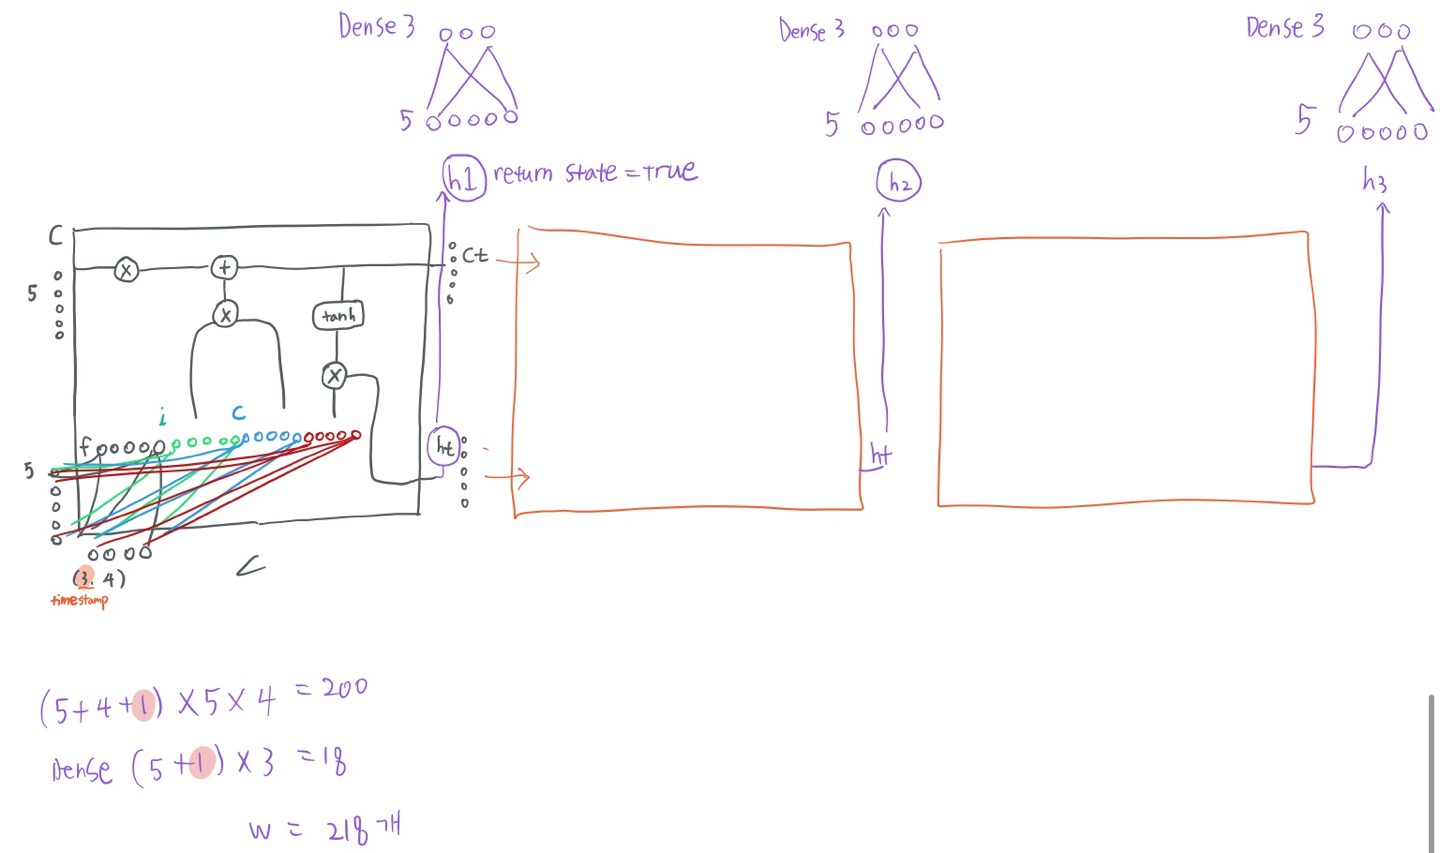

In [14]:
from tensorflow.keras import layers, models

model = models.Sequential() #모델 호출
model.add(
    layers.LSTM(units=5, #유닛 생략 가능
                input_shape = (3, 4),
                return_sequences = True, #덴스 레이어를 3번 돌려서 뽑겠다.
                name='LSTM-1'))

model.add(
    layers.Dense(
        units=3,
        activation='softmax',
        name='hidden-to-output')) # 출력을 위한 FFN


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy'])


In [15]:
model.fit(train_X, train_Y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0763 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0754 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0745 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0735 - accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0726 - accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 1.0717 - accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0708 - accuracy: 0.6667
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 1.0698 - accuracy: 0.6667
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0689 - accuracy: 0.6667
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0680 - accuracy: 0.6667
Epoch 11/100
1/1 [======

In [16]:
predictions = model.predict(train_X)
for i, prediction in enumerate(predictions):
  print(prediction)
  print(np.argmax(prediction, axis=1))
  result_str = [idx2tag[c] for c in np.argmax(prediction, axis=1) ]
  print("\tPrediction str: ", "".join(result_str))


1/1 [==============================] - 0s 346ms/step
[[0.34100625 0.35218215 0.30681166]
 [0.3067791  0.40706113 0.28615978]
 [0.2926166  0.29365107 0.41373235]]
[1 1 2]
	Prediction str:  VVO
[[0.32302704 0.28290352 0.39406943]
 [0.30177733 0.37855867 0.319664  ]
 [0.29474524 0.27507097 0.43018383]]
[2 1 2]
	Prediction str:  OVO


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM-1 (LSTM)               (None, 3, 5)              200       
                                                                 
 hidden-to-output (Dense)    (None, 3, 3)              18        
                                                                 
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '=>', model_weight.shape)


LSTM-1/lstm_cell_14/kernel:0 => (4, 20)
LSTM-1/lstm_cell_14/recurrent_kernel:0 => (5, 20)
LSTM-1/lstm_cell_14/bias:0 => (20,)
hidden-to-output/kernel:0 => (5, 3)
hidden-to-output/bias:0 => (3,)


### 문제1

In [ ]:
model = Sequential()
model.add(LSTM(7, input_shape=(100,5)))
model.summary()

# W = 13*7*4 = 364

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7)                 364       
                                                                 
Total params: 364
Trainable params: 364
Non-trainable params: 0
_________________________________________________________________


- W_forget : (num_units + input_dim + 1) * num_units
- W_input : (num_units + input_dim + 1) * num_units
- W_output : (num_units + input_dim + 1) * num_units
- W_cell : (num_units + input_dim + 1) * num_units

### 문제2

In [ ]:
model = Sequential()
model.add(LSTM(5, input_shape = (2, 10)))
model.add(Dense(1))
model.summary()

#W = 16 * 5 * 4 = 320 , Bias 5개가 한 개로 연결, 6개 총 326개

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5)                 320       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 326
Trainable params: 326
Non-trainable params: 0
_________________________________________________________________


- W_forget : (num_units + input_dim + 1) * num_units
- W_input : (num_units + input_dim + 1) * num_units
- W_output : (num_units + input_dim + 1) * num_units
- W_cell : (num_units + input_dim + 1) * num_units

In [ ]:
# weight 개수 카운팅

### 문제3

In [ ]:
model = Sequential()
model.add(LSTM(5, input_shape = (2, 10), return_sequences=True))
model.add(LSTM(7))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 5)              320       
                                                                 
 lstm_5 (LSTM)               (None, 7)                 364       
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 692
Trainable params: 692
Non-trainable params: 0
_________________________________________________________________


# 3. Keras로 GRU 구현하기

https://keras.io/api/layers/recurrent_layers/gru/

In [18]:
train_X

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]]], dtype=float32)

In [19]:
gru = GRU(10, return_sequences = True, return_state = True)
whole_hidden_state, final_hidden_state = gru(train_X)

In [20]:
whole_hidden_state.shape

TensorShape([2, 3, 10])

In [21]:
final_hidden_state.shape

TensorShape([2, 10])

In [22]:
# return_sequences = True
gru = GRU(3, return_sequences=True, return_state=True)
whole_sequence_output, final_state= gru(train_X)

print('whole_seq_output: {}, shape: {}'.format(whole_seq_output, whole_seq_output.shape))
print('final_state : {}, shape: {}'.format(final_state, final_state.shape))

whole_seq_output: [[[ 0.040941    0.0299633  -0.17453797]
  [ 0.09863089  0.13346939  0.04203638]
  [ 0.08469316  0.20032497 -0.03239341]]

 [[ 0.02732586  0.10678348 -0.08072892]
  [ 0.09525546  0.17129181  0.10592014]
  [ 0.08771934  0.20776102  0.01240165]]], shape: (2, 3, 3)
final_state : [[ 0.00762979 -0.24628285 -0.17957428]
 [ 0.02534437 -0.18867016 -0.29090425]], shape: (2, 3)


In [24]:
from tensorflow.keras import layers, models

model = models.Sequential() #모델 호출
model.add(
    layers.GRU(
        units=5,
        input_shape =(3, 4), # 10 * 5*3 = 150개
        return_sequences = True,
        reset_after=False,
        name='GRU-1')) # RNN 호출

# reset_after : keras 구현을 하면서 병렬처리를 위해 공식을 수정(bias를 2개로 나눔)하였는데, 원래 논문에 나온 공식으로 계산하기 위해 False로 수정

model.add(
    layers.Dense(
        units=3, #6*3 = 18개
        activation='softmax',
        name='hidden-to-output')) # 출력을 위한 FFN


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'])


In [ ]:
model.fit(train_X, train_Y, epochs= 100)

In [ ]:
predictions = model.predict(train_X)
for i, prediction in enumerate(predictions):
  print(prediction)
  print(np.argmax(prediction, axis=1))
  result_str = [idx2tag[c] for c in np.argmax(prediction, axis=1) ]
  print("\tPrediction str: ", "".join(result_str))


1/1 [==============================] - 0s 438ms/step
[[9.8557788e-01 1.4102679e-02 3.1941311e-04]
 [1.6076935e-02 9.7144395e-01 1.2479113e-02]
 [5.0632996e-03 1.8666392e-02 9.7627026e-01]]
[0 1 2]
	Prediction str:  SVO
[[9.6419764e-01 3.3043835e-02 2.7585761e-03]
 [1.7866999e-02 9.6090233e-01 2.1230677e-02]
 [3.9569856e-04 2.4343718e-02 9.7526056e-01]]
[0 1 2]
	Prediction str:  SVO


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU-1 (GRU)                 (None, 3, 5)              150       
                                                                 
 hidden-to-output (Dense)    (None, 3, 3)              18        
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '=>', model_weight.shape)

GRU-1/gru_cell_4/kernel:0 => (4, 15)
GRU-1/gru_cell_4/recurrent_kernel:0 => (5, 15)
GRU-1/gru_cell_4/bias:0 => (15,)
hidden-to-output/kernel:0 => (5, 3)
hidden-to-output/bias:0 => (3,)


### 문제1

In [ ]:
model = Sequential()
model.add(GRU(9, input_dim = 10, return_sequences=True, reset_after=False))
# reset_after : keras 구현을 하면서 병렬처리를 위해 공식을 수정(bias를 2개로 나눔)하였는데, 원래 논문에 나온 공식으로 계산하기 위해 False로 수정
model.add(GRU(6, reset_after = False))
model.add(Dense(3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, None, 9)           540       
                                                                 
 gru_7 (GRU)                 (None, 6)                 288       
                                                                 
 dense_6 (Dense)             (None, 3)                 21        
                                                                 
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


- W_reset : (num_units + input_dim + 1) * num_units
- W_update : (num_units + input_dim + 1) * num_units
- W_new : (num_units + input_dim + 1) * num_units


In [ ]:
# 첫번째 레이어의 파리미터 개수

In [ ]:
# 두번째 레이어의 파라미터 개수

In [ ]:
# 세번째 레이어의 파리미터 개수

### reference

- https://github.com/ukairia777/tensorflow-nlp-tutorial/blob/main/08.%20RNN/8-4.%20understanding_simplernn_and_lstm.ipynb